# Exploration

Exploring the raw data with descriptive statistics and density plots.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [2]:
def from_disk(path_to_file):
    """Reads raw .txt data from disk and returns a pandas.DataFrame."""
    
    return pd.read_csv(path_to_file , delim_whitespace=True, index_col=0)

In [3]:
def gen_stats(df):
    
    size = int(df.values.size)
    nans = int(np.sum(np.isnan(df.values)))
    
    output = [
        np.max(df.values), 
        np.min(df.values), 
        np.std(df.values),
        size, nans
    ]
    
    return output

In [4]:
def stats_table(datasets, index=None):
    
    _stats = []
    for dataset in datasets:
        _stats.append(gen_stats(dataset))
        
    df = pd.DataFrame(
        np.array(_stats), 
        columns=[
            'max', 'min', 'std', 'size', 'nan'
        ], 
        index=index
    )
    
    return df

In [5]:
# Load raw data into memory
orig_pvalues = from_disk(
    # NOTE: Transpose to (CpGs x genes).
    './../data/test/emQTL_CorrelationMatrix_unfiltered_pvalues.txt'
).T
sel_pvalues = from_disk(
    './../data/test/emQTL_CorrelationMatrix_significant_pvalues.txt'
)
orig_pcc = from_disk(
    # NOTE: Transpose to (CpGs x genes).
    './../data/test/emQTL_CorrelationMatrix_unfiltered_PCCs.txt'
).T
sel_pcc = from_disk(
    './../data/test/emQTL_CorrelationMatrix_significant_PCCs.txt'
)

In [6]:
np.shape(orig_pvalues), np.shape(sel_pvalues)

((27561, 2664), (27561, 2664))

In [7]:
np.shape(orig_pcc), np.shape(sel_pcc)

((27561, 2664), (27561, 2664))

In [8]:
datasets = {
    'org_pvalues': orig_pvalues,
    'sel_pvalues': sel_pvalues,
    'org_pcc': orig_pcc,
    'sel_pcc': sel_pcc
}

In [9]:
df = stats_table(
    list(datasets.values()),
    index=list(datasets.keys())
)

print('Statistics: \n{}'.format(df))

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


Statistics: 
                  max           min       std        size         nan
org_pvalues  1.000000  1.280734e-32  0.225681  73422504.0         0.0
sel_pvalues       NaN           NaN       NaN  73422504.0  72682896.0
org_pcc      0.852443 -8.669647e-01  0.323260  73422504.0         0.0
sel_pcc           NaN           NaN       NaN  73422504.0  72682896.0


**Observations:**
* Contains NaNs

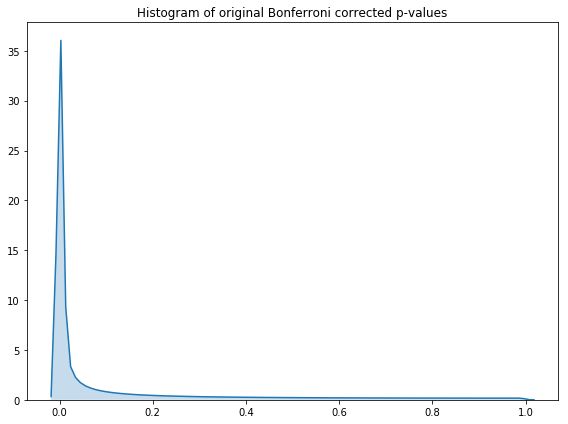

In [10]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Bonferroni corrected p-values')
sns.kdeplot(orig_pvalues.values.ravel(), shade=True)
plt.tight_layout()

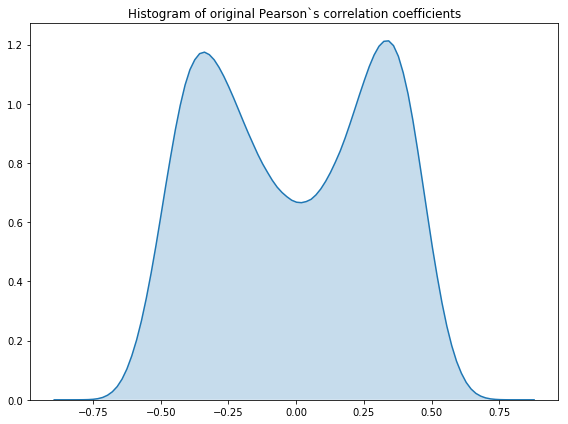

In [11]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of original Pearson`s correlation coefficients')
sns.kdeplot(orig_pcc.values.ravel(), shade=True)
plt.tight_layout()

**NOTE**: Does not visualize data with NaNs.